## Imports

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV


## Load Data

[Credit.csv](https://www.statlearning.com/s/Credit.csv)

In [2]:
credit_df = pd.read_csv('Credit.csv')
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [4]:
credit_df.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64

In [5]:
quantitative_cols = credit_df.select_dtypes(include=['number']).dtypes.index.tolist()
quantitative_cols

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']

In [6]:
credit_df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [7]:
qualitative_cols = credit_df.select_dtypes(include=['category', 'object']).dtypes.index.tolist()
qualitative_cols

['Own', 'Student', 'Married', 'Region']

In [8]:
for c in qualitative_cols:
    print(c, credit_df[c].unique())

Own ['No' 'Yes']
Student ['No' 'Yes']
Married ['Yes' 'No']
Region ['South' 'West' 'East']


In [9]:
for c in qualitative_cols:
    credit_df[c] = credit_df[c].astype('category')

In [10]:
credit_df.describe(include='category')

,Own,Student,Married,Region
count,400,400,400,400
unique,2,2,2,3
top,Yes,No,Yes,South
freq,207,360,245,199


In [11]:
response = 'Balance'
predictors = list(set(credit_df.columns) - set([response]))

In [12]:
X, y = credit_df[credit_df.columns.difference(['Balance'])], credit_df['Balance']

X = pd.get_dummies(X, drop_first=True)
# X = pd.get_dummies(X)
X.head(5)

,Age,Cards,Education,Income,Limit,Rating,Married_Yes,Own_Yes,Region_South,Region_West,Student_Yes
0,34,2,11,14.891,3606,283,1,0,1,0,0
1,82,3,15,106.025,6645,483,1,1,0,1,1
2,71,4,11,104.593,7075,514,0,0,0,1,0
3,36,3,11,148.924,9504,681,0,1,0,1,0
4,68,2,16,55.882,4897,357,1,0,1,0,0


In [13]:
X_scaled = pd.DataFrame(scale(X), columns=X.columns)
X_scaled.head()

,Age,Cards,Education,Income,Limit,Rating,Married_Yes,Own_Yes,Region_South,Region_West,Student_Yes
0,-1.257674,-0.699130,-0.784930,-0.861583,-0.489999,-0.465539,0.795395,-1.035635,1.005013,-0.585049,-0.333333
1,1.528451,0.031032,0.496588,1.727437,0.828261,0.828703,0.795395,0.965592,-0.995012,1.709260,3.000000
2,0.889964,0.761194,-0.784930,1.686756,1.014787,1.029311,-1.257237,-1.035635,-0.995012,1.709260,-0.333333
3,-1.141586,0.031032,-0.784930,2.946152,2.068440,2.110003,-1.257237,0.965592,-0.995012,1.709260,-0.333333
4,0.715831,-0.699130,0.816968,0.302928,0.070012,0.013331,0.795395,-1.035635,1.005013,-0.585049,-0.333333


## Ridge

In [14]:
# np.power(10, np.linspace(-4, 6, 100))

In [15]:
alphas = np.logspace(-4, 6, 100)

In [16]:
coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

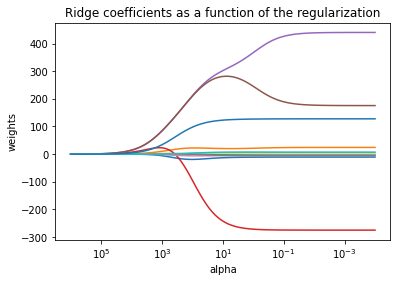

In [17]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')

In [18]:
np.argsort(np.abs(coefs[0]))

array([ 2,  6,  8,  7,  9,  0,  1, 10,  5,  3,  4], dtype=int64)

In [19]:
np.argpartition(np.abs(coefs[0]), 4)

array([ 8,  6,  2,  7,  9,  0,  1, 10,  4,  3,  5], dtype=int64)

In [20]:
np.argpartition(np.abs(coefs[0]), -4)

array([ 7,  0,  2,  9,  8,  1,  6, 10,  4,  3,  5], dtype=int64)

In [21]:
ind = np.argsort(np.abs(coefs[0]))[-4:]
ind

array([10,  5,  3,  4], dtype=int64)

In [22]:
# get largest coefficient indices
ind = np.argpartition(np.abs(coefs[0]), -4)[-4:]
print(ind)

[10  4  3  5]


In [23]:
X.columns[ind]

Index(['Student_Yes', 'Limit', 'Income', 'Rating'], dtype='object')

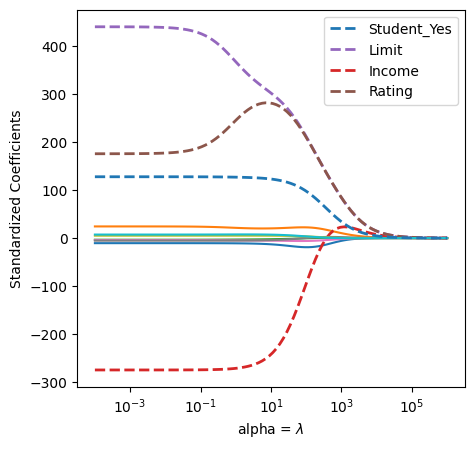

In [24]:
plt.figure(figsize=(5,5), dpi=100)

plt.plot(alphas, coefs)

ax = plt.gca()
ax.set_xscale('log')
ax.set_xlabel('alpha = $\\lambda$')
ax.set_ylabel('Standardized Coefficients')

for line in np.array(ax.get_lines())[ind]:
    line.set_linestyle('--')
    line.set_linewidth(2)

ax.legend(np.array(ax.get_lines())[ind], X.columns[ind])

plt.show()

### Normalized $\lambda$

In [25]:
ridge_norm = np.linalg.norm(coefs[0])
norm_coefs = np.linalg.norm(coefs/ridge_norm, axis=1)

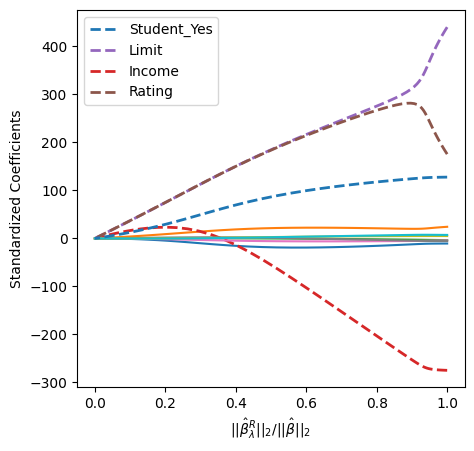

In [26]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(norm_coefs, coefs)

ax = plt.gca()
ax.set_xlabel('$||\\hat{\\beta}^R_{\\lambda}||_2/||\\hat{\\beta}||_2$')
ax.set_ylabel('Standardized Coefficients')

for line in np.array(ax.get_lines())[ind]:
    line.set_linestyle('--')
    line.set_linewidth(2)

ax.legend(np.array(ax.get_lines())[ind], X.columns[ind])

plt.show()

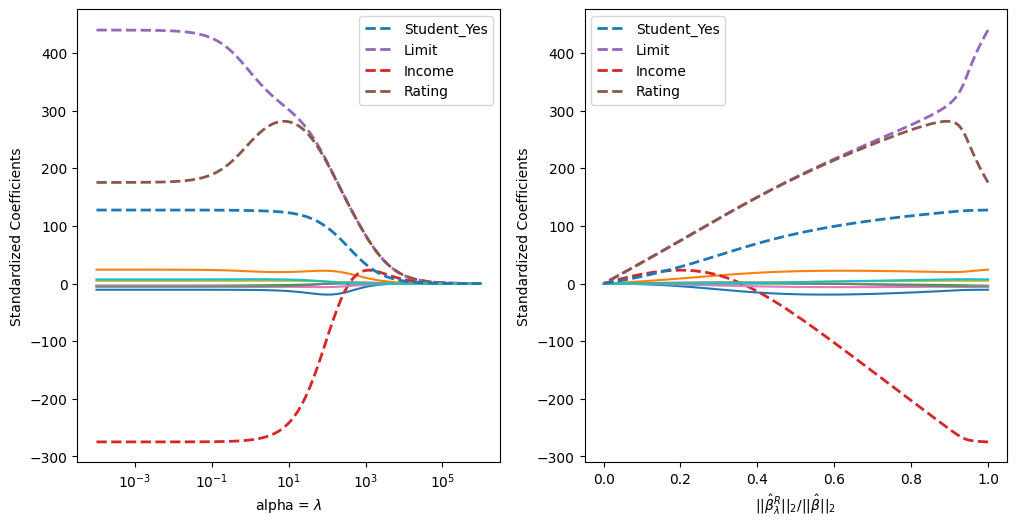

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), dpi=100)

axes[0].plot(alphas, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('alpha = $\\lambda$')
axes[0].set_ylabel('Standardized Coefficients')

for line in np.array(axes[0].get_lines())[ind]:
    line.set_linestyle('--')
    line.set_linewidth(2)
    
axes[0].legend(np.array(ax.get_lines())[ind], X.columns[ind])

axes[1].plot(norm_coefs, coefs)
axes[1].set_xlabel('$||\\hat{\\beta}^R_{\\lambda}||_2/||\\hat{\\beta}||_2$')
axes[1].set_ylabel('Standardized Coefficients')

for line in np.array(axes[1].get_lines())[ind]:
    line.set_linestyle('--')
    line.set_linewidth(2)
    
axes[1].legend(np.array(ax.get_lines())[ind], X.columns[ind])

plt.show()

### Selecting Parameter
[linear_model.RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

## Lasso


In [28]:
alphas = np.logspace(-1, 3, 100)
# print(alphas)

coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)

In [29]:
# get largest coefficient indices
ind = np.argpartition(np.abs(coefs[0]), -4)[-4:]
print(ind)

[10  4  3  5]


In [30]:
X.columns[ind]

Index(['Student_Yes', 'Limit', 'Income', 'Rating'], dtype='object')

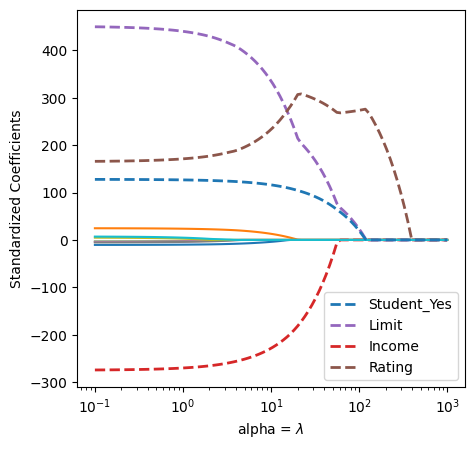

In [31]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(alphas, coefs)

ax = plt.gca()
ax.set_xscale('log')
ax.set_xlabel('alpha = $\\lambda$')
ax.set_ylabel('Standardized Coefficients')

for line in np.array(ax.get_lines())[ind]:
    line.set_linestyle('--')
    line.set_linewidth(2)

ax.legend(np.array(ax.get_lines())[ind], X.columns[ind])

plt.show()

### Normalized $\lambda$

In [32]:
lasso_norm = np.linalg.norm(coefs[0])
norm_coefs = np.linalg.norm(coefs/lasso_norm, axis=1)

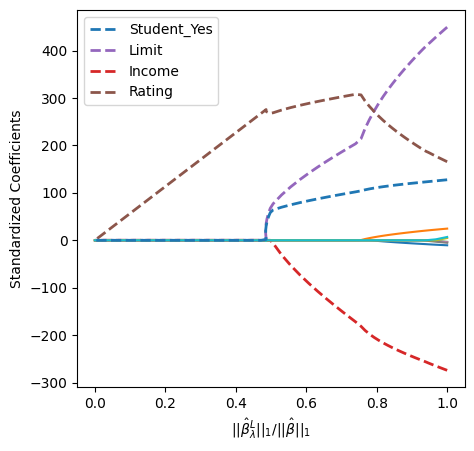

In [33]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(norm_coefs, coefs)

ax = plt.gca()
ax.set_xlabel('$||\\hat{\\beta}^L_{\\lambda}||_1/||\\hat{\\beta}||_1$')
ax.set_ylabel('Standardized Coefficients')

for line in np.array(ax.get_lines())[ind]:
    line.set_linestyle('--')
    line.set_linewidth(2)

ax.legend(np.array(ax.get_lines())[ind], X.columns[ind])

plt.show()

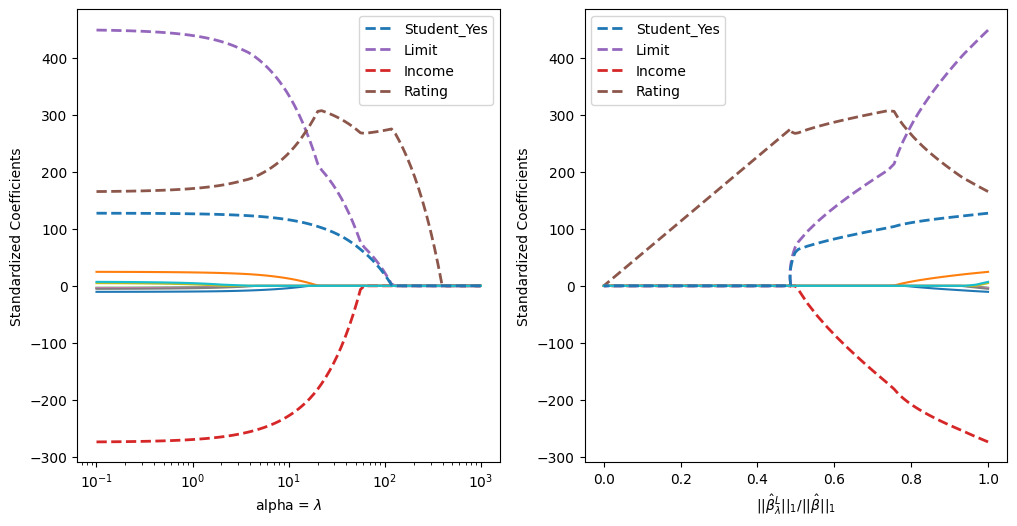

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), dpi=100)

axes[0].plot(alphas, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('alpha = $\\lambda$')
axes[0].set_ylabel('Standardized Coefficients')

for line in np.array(axes[0].get_lines())[ind]:
    line.set_linestyle('--')
    line.set_linewidth(2)

axes[0].legend(np.array(ax.get_lines())[ind], X.columns[ind])

axes[1].plot(norm_coefs, coefs)
axes[1].set_xlabel('$||\\hat{\\beta}^L_{\\lambda}||_1/||\\hat{\\beta}||_1$')
axes[1].set_ylabel('Standardized Coefficients')

for line in np.array(axes[1].get_lines())[ind]:
    line.set_linestyle('--')
    line.set_linewidth(2)

axes[1].legend(np.array(ax.get_lines())[ind], X.columns[ind])

plt.show()

### Selecting Parameter
[linear_model.LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)